In [2]:
import pandas as pd
import plotly.express as px
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np 

movies_data = pd.read_csv("movies/movies.csv",  encoding='latin-1')

# Leer datos de un csv
movies_data

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,920081,0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100,False,...,16.662,2021-11-26,6.8,108,2,1,1,10,2,4
9996,920143,0,Comedy,NaN,Caracol Televisión|Dago García Producciones,CO|CO,Colombia,0.0,97,False,...,491.706,2021-12-25,1.5,2,1,2,1,8,1,1
9997,922017,0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112,False,...,565.658,2021-12-17,6.1,30,1,1,17,1,0,922017
9998,922162,0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59,False,...,9.664,2021-12-17,6.0,1,1,0,0,0,922162,The Witcher: Fireplace


# Ejercicio 1 Exploración rapida de los datos

## 1.1 Resumen del set de datos

In [3]:
movies_data.describe()

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,249876.829300,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600
std,257380.109004,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


## 1.2 Cuenta de valores nulos

In [4]:

null_count = movies_data.isnull().sum()
null_count

id                              0
budget                          0
genres                         53
homePage                     5807
productionCompany             457
productionCompanyCountry     1280
productionCountry             233
revenue                         0
runtime                         0
video                         486
director                       74
actors                         80
actorsPopularity               87
actorsCharacter                47
originalTitle                   0
title                           0
originalLanguage                0
popularity                      0
releaseDate                     0
voteAvg                         0
voteCount                       0
genresAmount                    0
productionCoAmount              0
productionCountriesAmount       0
actorsAmount                    0
castWomenAmount                 0
castMenAmount                   0
dtype: int64

## 1.3 El tipo de cada variable

In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   budget                     10000 non-null  int64  
 2   genres                     9947 non-null   object 
 3   homePage                   4193 non-null   object 
 4   productionCompany          9543 non-null   object 
 5   productionCompanyCountry   8720 non-null   object 
 6   productionCountry          9767 non-null   object 
 7   revenue                    10000 non-null  float64
 8   runtime                    10000 non-null  int64  
 9   video                      9514 non-null   object 
 10  director                   9926 non-null   object 
 11  actors                     9920 non-null   object 
 12  actorsPopularity           9913 non-null   object 
 13  actorsCharacter            9953 non-null   obje

Aca podemos observar que mas del 50% de las peliculas no cuenta con una pagina de inicio o al menos no esta en el data set

# Ejercicio 2 Tipo de cada variable y descripción

|          Variable         | Tipo (Cuantitativa o   Cualitativa) | Discreta o Continua / Nominal o   Ordinal | Tipo del Dato |                        Ejemplo                       | descripción                                                       |
|:-------------------------:|:-----------------------------------:|:-----------------------------------------:|:-------------:|:----------------------------------------------------:|-------------------------------------------------------------------|
|             id            |             Cuantitativa            |                  Discreta                 |     int64     |                           1                          | Id de la película                                                 |
|           budget          |             Cuantitativa            |                  Continua                 |     int64     |                        1000000                       | El presupuesto para la película                                   |
|           genres          |             Cualitativa             |                  Nominal                  |     object    |                    Action, Comedy                    | El género de la película                                          |
|          homePage         |             Cualitativa             |                  Nominal                  |     object    |                    www.example.com                   | La página de inicio de la película                                |
|     productionCompany     |             Cualitativa             |                  Nominal                  |     object    |                 Miramax\|A Band Apart                | Las compañías productoras de la película.                         |
|  productionCompanyCountry |             Cualitativa             |                  Nominal                  |     object    |                      US\|US\|JP                      | Países de las compañías productoras de la película                |
|     productionCountry     |             Cualitativa             |                  Nominal                  |     object    |       United States of America\|Canada\|Germany      | Países en los que se llevó a cabo la producción  de la película   |
|          revenue          |             Cuantitativa            |                  Continua                 |    float64    |                       1500000.5                      | El ingreso de la película                                         |
|          runtime          |             Cuantitativa            |                  Continua                 |     int64     |                          120                         | La duración de la película                                        |
|           video           |             Cualitativa             |                  Nominal                  |     object    |                         FALSE                        | Si tiene videos promocionales o no                                |
|          director         |             Cualitativa             |                  Nominal                  |     object    |                   Christopher Nolan                  | Director de la película                                           |
|           actors          |             Cualitativa             |                  Nominal                  |     object    |                   Leonardo DiCaprio                  | Actores que participan en la película (Elenco)                    |
|      actorsPopularity     |             Cualitativa             |                  Nominal                  |     object    |           \| 9.008\|6.383\|10.757\|18.295\|          | Indice de popularidad del elenco de la película.                  |
|      actorsCharacter      |             Cualitativa             |                  Nominal                  |     object    |  Ted the   Bellhop\|Angela\|Man\|Athena\|Siegfried\| | Personaje que interpreta cada actor en la película                |
|       originalTitle       |             Cualitativa             |                  Nominal                  |     object    |                       Inception                      | El título original de la película, en su idioma original          |
|           title           |             Cualitativa             |                  Nominal                  |     object    |                       Inception                      | El título de la película traducido al inglés                      |
|      originalLanguage     |             Cualitativa             |                  Nominal                  |     object    |                        English                       | Idioma original en que se encuentra la película                   |
|         popularity        |             Cuantitativa            |                  Continua                 |    float64    |                         95.6                         | Índice de popularidad de la película calculado semanalmente       |
|        releaseDate        |             Cualitativa             |                  Nominal                  |     object    |                       7/16/2010                      | Fecha de lanzamiento de la película                               |
|          voteAvg          |             Cuantitativa            |                  Continua                 |    float64    |                          8.5                         | El promedio de los votos en la plataforma para la película        |
|         voteCount         |             Cuantitativa            |                  Discreta                 |     int64     |                         12000                        | El número de votos en la plataforma para la película              |
|        genresAmount       |             Cuantitativa            |                  Discreta                 |     int64     |                           3                          | Cantidad de géneros que representan la película                   |
|     productionCoAmount    |             Cuantitativa            |                  Discreta                 |     int64     |                           2                          | Cantidad de compañías productoras que participaron en la película |
| productionCountriesAmount |             Cuantitativa            |                  Discreta                 |     int64     |                           5                          | Cantidad de países en los que se rodó la película                 |
|        actorsAmount       |             Cuantitativa            |                  Discreta                 |     int64     |                          10                          | Cantidad de personas que actúan en la película                    |
|      castWomenAmount      |             Cualitativa             |                  Nominal                  |     object    |                           5                          | Cantidad de actrices en el elenco de la película                  |
|       castMenAmount       |             Cualitativa             |                  Nominal                  |     object    |                           8                          | Cantidad de actores en el elenco de la película                   |


# Ejercicio 3 Variables

## 3.1 variables cuantitativas

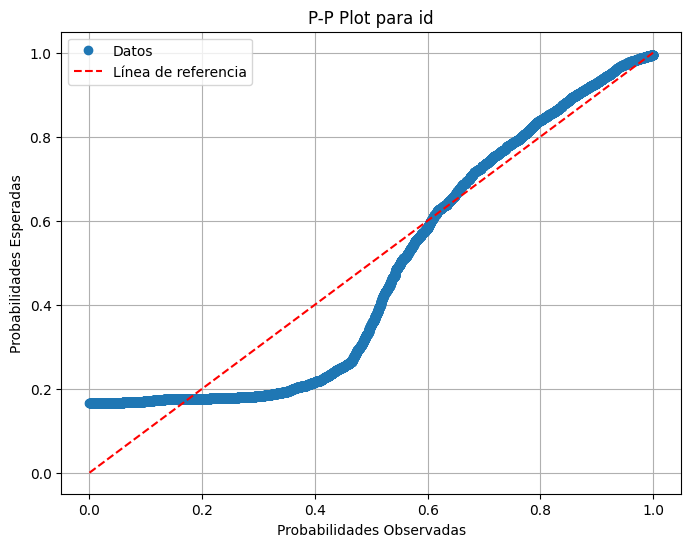

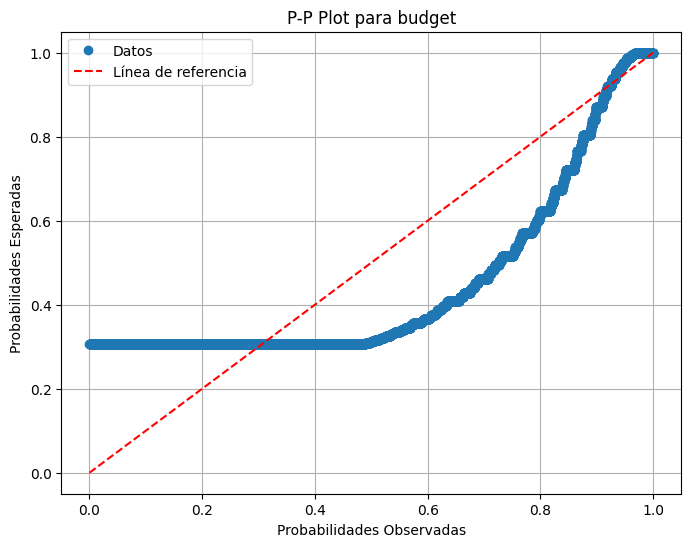

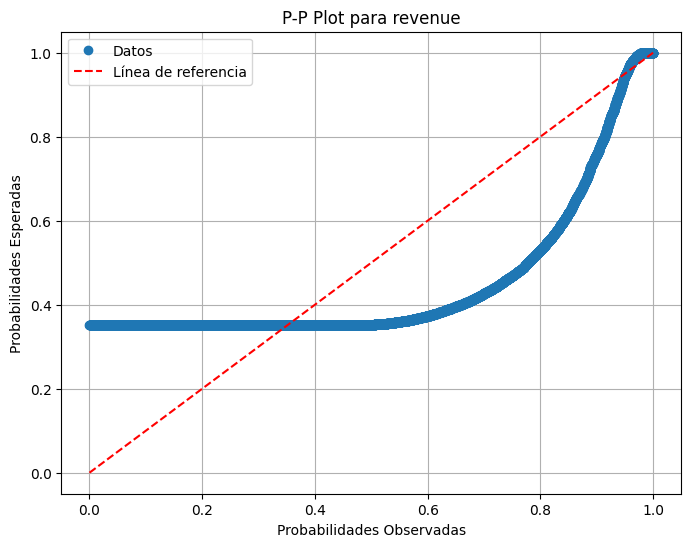

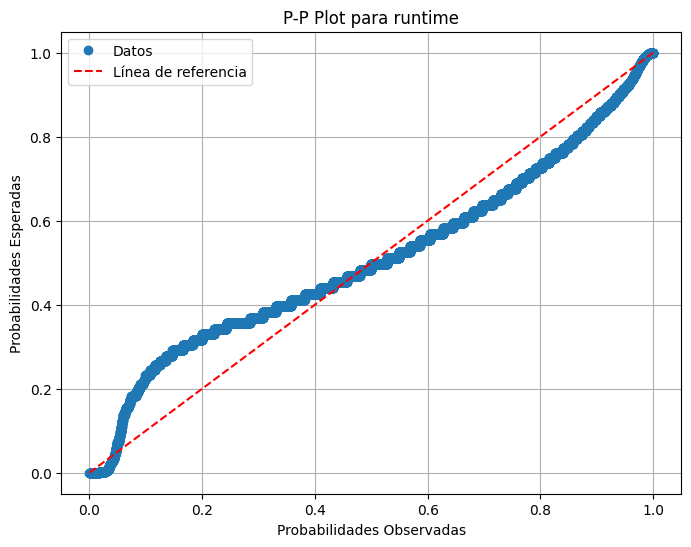

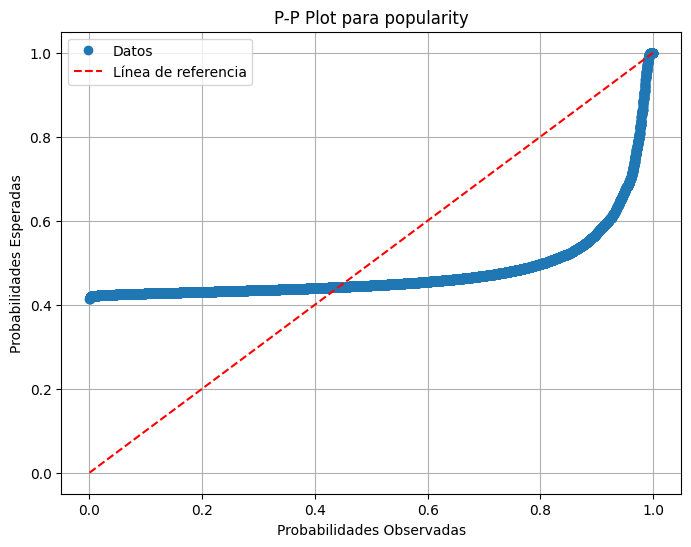

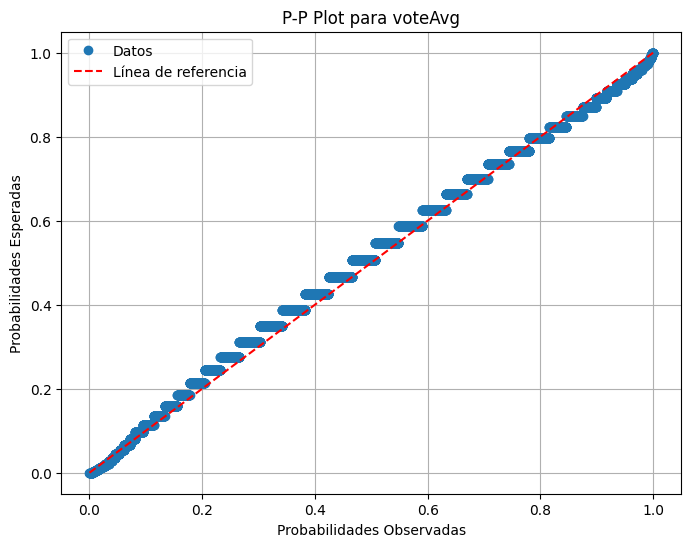

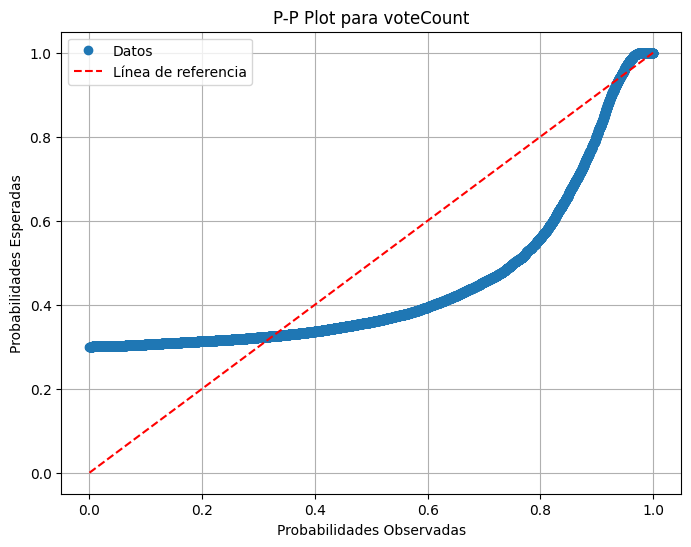

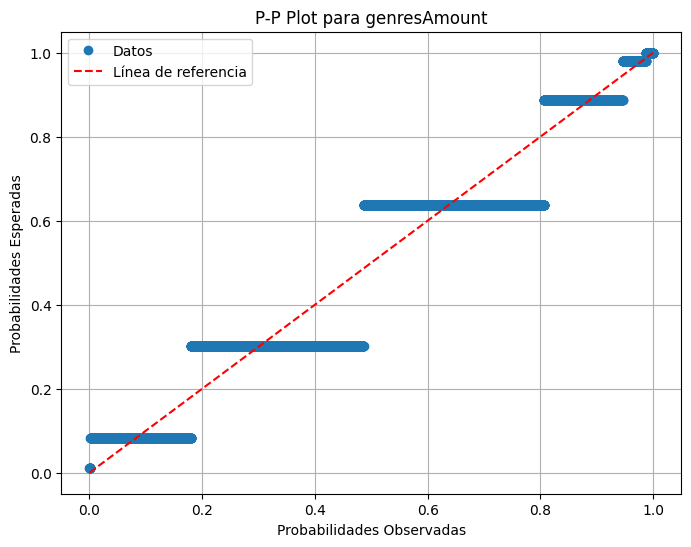

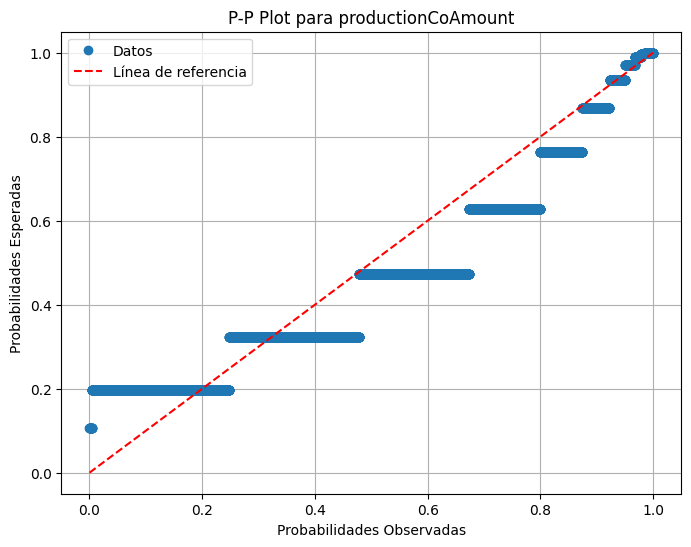

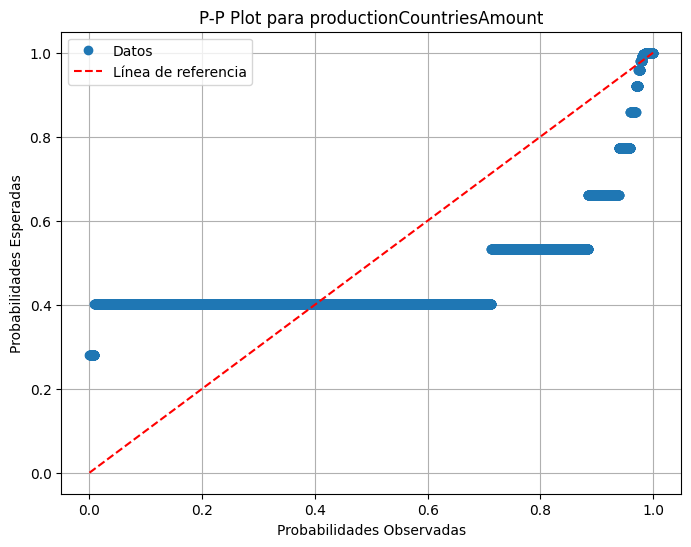

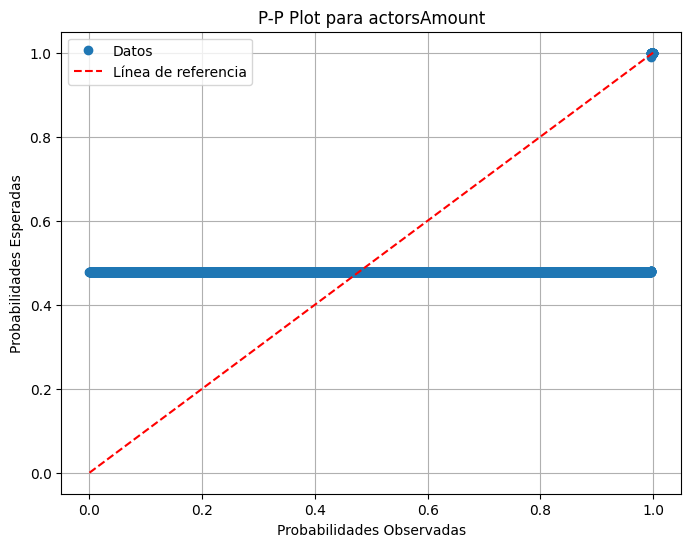

In [6]:
var_cuantitativas = movies_data.select_dtypes(include=np.number)
normalidad = {}

for col in var_cuantitativas.columns:
    stat, p = st.kstest(var_cuantitativas[col], 'norm', args=(var_cuantitativas[col].mean(), var_cuantitativas[col].std()))
    normalidad[col] = {'Estadisticos: ', stat, 'p-valor: ', p, 'Normal: ', p>0.05}

for col in var_cuantitativas.columns:
    data_sorted = np.sort(var_cuantitativas[col])
    cum_prob = np.linspace(0, 1, len(data_sorted))
    
    norm_data = st.norm.cdf(data_sorted, loc=var_cuantitativas[col].mean(), scale=var_cuantitativas[col].std())

    # Graficar P-P Plot
    plt.figure(figsize=(8, 6))
    plt.plot(cum_prob, norm_data, marker='o', linestyle='', label='Datos')
    plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Línea de referencia')
    plt.title(f'P-P Plot para {col}')
    plt.xlabel('Probabilidades Observadas')
    plt.ylabel('Probabilidades Esperadas')
    plt.legend()
    plt.grid(True)
    plt.show()

## 3.2 Variables Cualitativas

In [7]:

var_cualitativas = movies_data.select_dtypes(exclude=np.number)

tabla_frecuencia = {col: var_cualitativas[col].value_counts().sort_values(ascending=False) for col in var_cualitativas.columns}

frecuencia_df = pd.concat(tabla_frecuencia, axis=1)

frecuencia_df.fillna(0, inplace=True)

frecuencia_df

,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,video,director,actors,actorsPopularity,actorsCharacter,originalTitle,title,originalLanguage,releaseDate,castWomenAmount,castMenAmount
Drama,521.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedy,440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Horror,230.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drama|Romance,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Horror|Thriller,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
901407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
911071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
912223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Ej 4
## Preguntas

## a) ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [8]:
top_budget = movies_data[["budget","title"]].sort_values(by = "budget", ascending=False).head(10)
data = {
    'title' : top_budget["title"].tolist(),
    'budget' : top_budget["budget"].tolist()
}
fig = px.bar(data, x='title', y='budget', title='Top 10 budget movies')
fig.show()

## b) ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [35]:
top_revenue_movies = movies_data.nlargest(10, 'revenue')[['title', 'originalTitle', 'revenue']]

movies_revenue = px.bar(
    top_revenue_movies, 
    x="revenue", 
    y="title", 
    orientation="h", 
    title="Top 10 Películas con Mayores Ingresos",
    labels={"revenue": "Ingresos ($)", "title": "Película"},
    text="revenue", 
)

movies_revenue.update_layout(yaxis=dict(categoryorder="total ascending"))

movies_revenue.show()

print('LAS PELICULAS CON MAYORES INGRESO SON: ', top_revenue_movies['title'].tolist())

LAS PELICULAS CON MAYORES INGRESO SON:  ['Avatar', 'Avengers: Endgame', 'Titanic', 'Star Wars: The Force Awakens', 'Avengers: Infinity War', 'Jurassic World', 'The Lion King', 'Spider-Man: No Way Home', 'The Avengers', 'Furious 7']


## c) ¿Cuál es la película que más votos tuvo?

In [9]:
top_votes_movie = movies_data[["title","voteCount"]].sort_values(by="voteCount", ascending=False).head(1)
print(top_votes_movie.values[0][0])

Inception


## d)  ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

In [23]:
worst_movie = movies_data.nsmallest(1, 'voteAvg')[['title', 'voteAvg', 'voteCount']]

print('LA PEOR PELICULA SEGUN LOS VOTOS DE LOS USUARIOS ES ', worst_movie.values[0][0])
worst_movie

LA PEOR PELICULA SEGUN LOS VOTOS DE LOS USUARIOS ES  DAKAICHI -I'm Being Harassed by the Sexiest Man of the Year- The Movie: In Spain


,title,voteAvg,voteCount
9786,DAKAICHI -I'm Being Harassed by the Sexiest Ma...,1.3,2


## f) ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. ¿A qué género principal pertenecen las películas más largas?

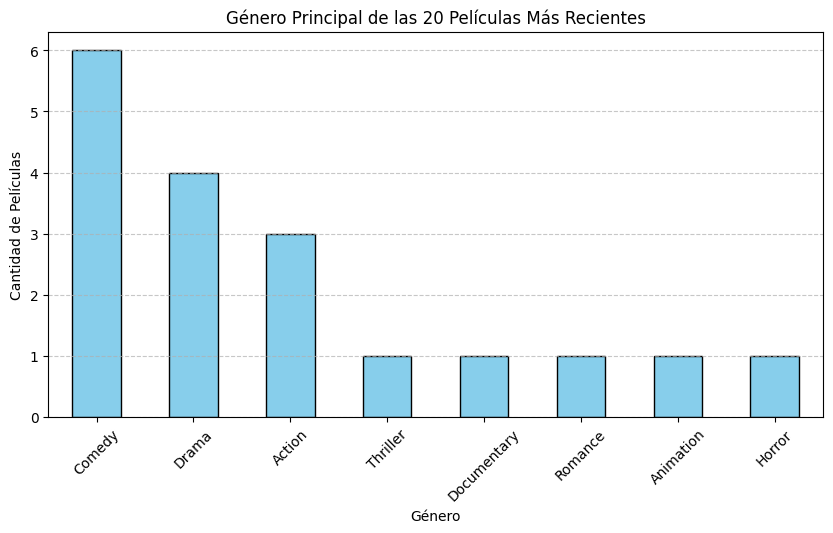

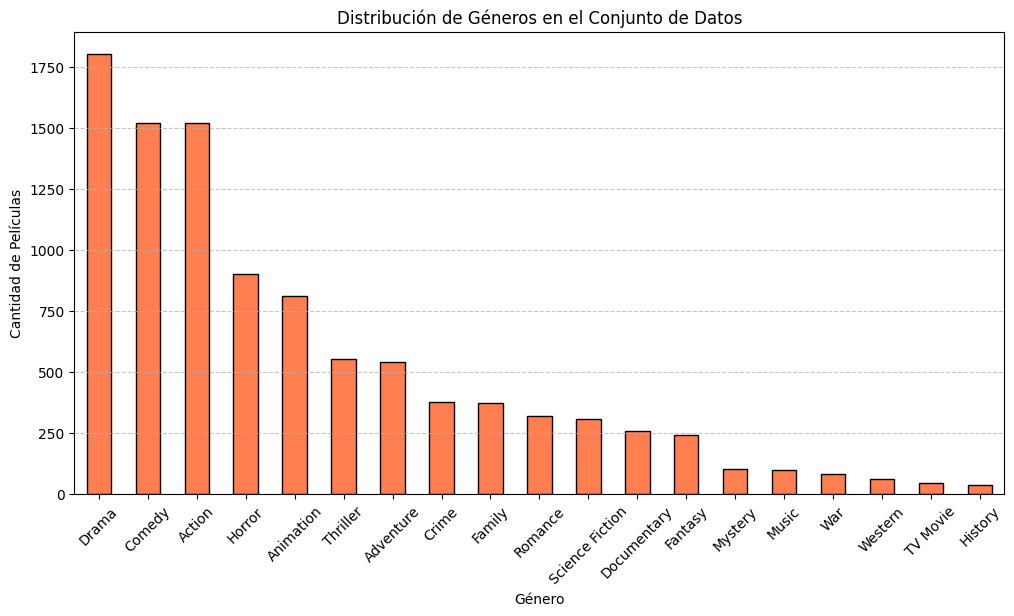

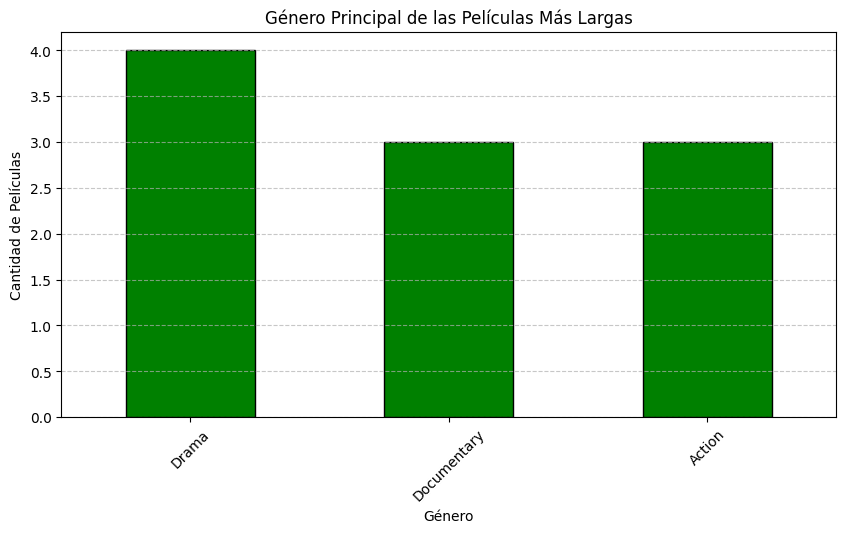

GENERO PRINCIPAL EN LAS 20 PELICULAS MAS RECIENTES:  Comedy 
DISTRIBUCION DE GENERO PRINCIPAL EN LOS DATOS:  Drama 
GENERO EN LARGAS PELICULAS:  Drama


In [32]:
movies_data['releaseDate'] = pd.to_datetime(movies_data['releaseDate'], errors='coerce')
movies_data['mainGenre'] = movies_data['genres'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else None)

latest_20_movies = movies_data.sort_values(by='releaseDate', ascending=False).head(20)
latest_20_genres = latest_20_movies['mainGenre'].value_counts()

overall_genre_counts = movies_data['mainGenre'].value_counts()

longest_movies = movies_data.nlargest(10, 'runtime')[['title', 'runtime', 'mainGenre']]
longest_movie_genres = longest_movies['mainGenre'].value_counts()


plt.figure(figsize=(10,5))
latest_20_genres.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Género Principal de las 20 Películas Más Recientes")
plt.xlabel("Género")
plt.ylabel("Cantidad de Películas")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12,6))
overall_genre_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Distribución de Géneros en el Conjunto de Datos")
plt.xlabel("Género")
plt.ylabel("Cantidad de Películas")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10,5))
longest_movie_genres.plot(kind='bar', color='green', edgecolor='black')
plt.title("Género Principal de las Películas Más Largas")
plt.xlabel("Género")
plt.ylabel("Cantidad de Películas")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('GENERO PRINCIPAL EN LAS 20 PELICULAS MAS RECIENTES: ', latest_20_genres.idxmax(), '\nDISTRIBUCION DE GENERO PRINCIPAL EN LOS DATOS: ', overall_genre_counts.idxmax(), '\nGENERO EN LARGAS PELICULAS: ', longest_movie_genres.idxmax())
